# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [ ]:
predicting the price of a used car, using features like mileage and year

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
warnings.filterwarnings('ignore')

In [50]:
#Read the file
df = pd.read_csv('vehicles.csv')
# Drop all rows with missing values to ensure clean and complete data for modeling
df = df.dropna()
# Display the number of missing (NaN) values in each column of the dataset
print(df.isnull().sum())
print(df.head())
print(df.info())
print(df.describe())
#Average price baseline
print("mean of price ", df['price'].mean())

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64
             id      region  price    year manufacturer              model  \
126  7305672709      auburn      0  2018.0    chevrolet  express cargo van   
127  7305672266      auburn      0  2019.0    chevrolet  express cargo van   
128  7305672252      auburn      0  2018.0    chevrolet  express cargo van   
215  7316482063  birmingham   4000  2002.0       toyota               echo   
219  7316429417  birmingham   2500  1995.0          bmw               525i   

     condition    cylinders fuel  odometer title_status transmission  \
126   like new  6 cylinders  gas   68472.0        clean    automatic   
127   like new  6 cylinders  gas   69125.0        

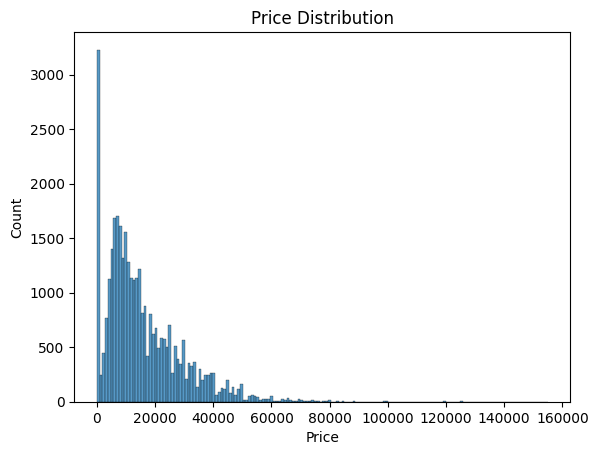

In [76]:
#Display a histogram of the prices of the car
sns.histplot(df['price'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

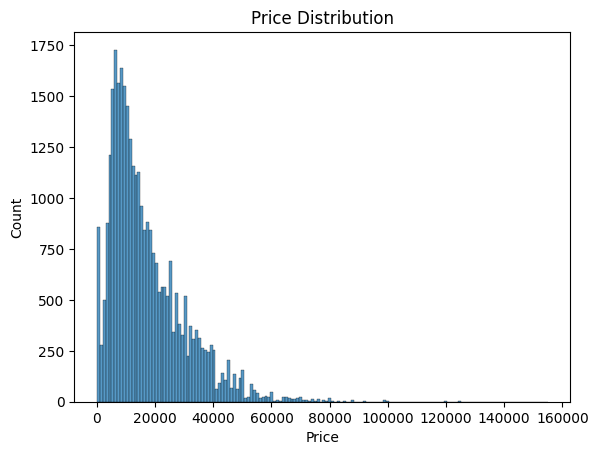

In [99]:
#Removing the cars with prices showing $0 price
df_non_zero = df[df['price'] != 0]
sns.histplot(df_non_zero['price'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [101]:
# Remove the target variable 'price' from the dataset to create the feature matrix X
X = df_non_zero.drop('price', axis = 1)
# Extract the target variable 'price' as the response vector y
y = df_non_zero['price']

In [102]:
# Keep only numerical columns (int and float types) in the feature matrix X
X = X.select_dtypes(include=['int64', 'float64'])
X = X.drop('id', axis = 1)
print(X.dtypes)

year        float64
odometer    float64
dtype: object


In [103]:
# Split the dataset into training and testing sets (80% train, 20% test) for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [104]:
# Create a pipeline that applies polynomial feature transformation (degree 1) followed by linear regression
pipe = make_pipeline(
    PolynomialFeatures(degree = 1, include_bias = False),
    StandardScaler(),
    LinearRegression()
)
pipe.fit(X_train, y_train)
coef = pipe.named_steps['linearregression'].coef_
print(coef)
pred = pipe.predict(X_test)

[ 3559.53477571 -2620.69259581]


In [105]:
#Ridge regression
model_Ridge = make_pipeline(
    PolynomialFeatures(degree = 1, include_bias = False),
    StandardScaler(),
    Ridge(alpha=1.0)
)
model_Ridge.fit(X_train, y_train)
#Ridge(alpha=1.0).fit(X_train, y_train)
ridge_coef = model_Ridge.named_steps['ridge'].coef_
print(ridge_coef)
pred_Ridge = model_Ridge.predict(X_test)


[ 3559.41398657 -2620.61786128]


In [106]:
#Lasso regression
pipe_Lasso = make_pipeline(
    PolynomialFeatures(degree = 1, include_bias = False),
    StandardScaler(),
    Lasso(alpha = 0.01)
)
pipe_Lasso.fit(X_train, y_train)
lasso_coef = pipe_Lasso.named_steps['lasso'].coef_
print(lasso_coef)
pred_Lasso = pipe_Lasso.predict(X_test)




[ 3559.52921814 -2620.68379549]


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [107]:
#Display the square root error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')
print("Sample predictions:", pred[:5])
print("Actual values:", y_test[:5].values)




RMSE: 12592.38
Sample predictions: [22054.44205397 17019.50838375 13703.6710389  15780.06192193
 11458.65847043]
Actual values: [29950 15900  5849 17750  7500]


In [108]:
mse = mean_squared_error(y_test, pred_Ridge)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')

RMSE: 12592.36


In [109]:
rmse = np.sqrt(mean_squared_error(y_test, pred_Lasso))
print(f'RMSE: {rmse:.2f}')

RMSE: 12592.38


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.